In [55]:
import pandas as pd 
import json 
import re
import numpy as np

In [2]:
file_dir = 'C:/Users/adeve/Desktop/BootMaterials/Bootcamp/08-ETL/Movies_ETL/'

with open(f'{file_dir}/wikipedia-movies.json', mode = 'r') as file: 
    wiki_movies_raw = json.load(file)
# Load it as a json file first so that the first bits of bad data don't even make it to the dataframe 

In [3]:
len(wiki_movies_raw)

7311

In [4]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()
# Wont show all the columns because it's too big 
# Have to convert the columns into a list to view them all at once 

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
wiki_movies_df.columns.to_list()
# We can pick out what isn't useful 
# We can plan waht to do with teh not useful columsn 
# USe list comprehensives 

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [6]:
# Using list comprehension to loop through the movies and only keep the ones that have a director key, imdb_link and 
# DO NOT have a NO. of episodes key 

# Using list comphrension for filtering data 
#[expression for element in source_list]
# [expression for element in soure_list if filter_expression ]

# wiki_movies = [movie for movie in wiki_movies_raw
#                if ('Director' in movie or 'Directed by' in movie)
#                    and 'imdb_link' in movie]
# len(wiki_movies)


wiki_movies = [movie for movie in wiki_movies_raw
                  if("Director" in movie or "Directed by" in movie)
                      and "imdb_link" in movie 
                      and 'No. of episodes' not in movie]

In [7]:
wiki_df = pd.DataFrame(wiki_movies)
# IT's smart to save each cleaning process as a new table so if you mess up on a step you don't have to go all the way back 
# This is like when you're working with a file in R and you want to get a subset 
# it's not wise to rewrite the big file as the subsetted file 
# Just make other variable names for the different iterations 

wiki_df.head()
# We still have a lot of not needed columns 
# Se we have to plan a different appraoch of attack 

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating functions review: 

x = 'global value'

def foo():
    x = 'local value'
    print(x)

foo()
print(x)

The output of this code would be:

local value
global value

**Function 2** 
my_list = [1,2,3]
def append_four(x):
    x.append(4)
append_four(my_list)
print(my_list)

The output would be:

[1, 2, 3, 4]

It changed my_list to [1,2,3,4], even outside the function. To leave the original object unchanged, we need to make a copy. For lists, we make a copy with the list function; for dicts, we make a copy with the dict function, like so:

new_list = list(old_list)
new_dict = dict(old_dict)

## Lambda Functions 
Lambda functions are written in one line and automatically return a value without using the return keyword. Lambda functions have no name and are also known as "anonymous functions."


the basic syntax to a lambda function follows:

lambda arguments: expression

This function will take in an argument and will return the expression. Even though lambda functions are supposed to be anonymous, just this once we'll create a lambda function and assign a name so that we can see how they work. A lambda function that squares a value looks like the following:

lambda x: x * x

square = lambda x: x * x
square(5)
25

# Create a Function to Clean the Data, Part 1

In [8]:
# This just makes a copy of the information that you put into the function 

def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    return movie

In [9]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']
# Here we see that the different language columns are for alternate titles of the movie 

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [10]:
# THis is from the video 

# Create a function that will find and delete the data that we don't want 

# def clean_movie(movie):
#     movie = dict(movie) # We do this so that we have a new object for the changes to occur on 
#     alt_titles = {}
#     for key in ["Also known as", 'Arabic', "Cantonese", "Chinese", "French", 'Hangul', 'Hebrew', "Hepburn", 
#                'Japanese', "Literally", "Mandarin", "McCune-Relschauer", "Original title", "Polish", "Simplified", 
#                "Traditional", "Yiddish"]:
#         if key in movie: 
#             alt_titles[key] = movie[key]
#             movie.pop(key)
#         if len(alt_titles) > 0:
#             movie['alt_titles'] = alt_titles
            
#         return(movie)

wiki_movies_df.columns.to_list()

wiki_movies_df['McCune–Reischauer'] # THese are all NA to me, I hope that's what it's suppose to be 
# I bet they're differnet, but they were called in all weird 

# Use value_counts() to see if there are non-null values 
wiki_movies_df['McCune–Reischauer'].value_counts()
# THey have two instances of different non null values 

Wŏndŏp‘ul teijŭ    1
P‘ai sŭt‘ori       1
Name: McCune–Reischauer, dtype: int64

In [11]:
# Apply the function we made above to the clean_movies variable 
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [12]:
# Save to a new dataframe; like a checkpoint 
clean_movies_df = pd.DataFrame(clean_movies)

In [13]:
clean_movies_df.columns.to_list()
# We have a lot less to work with now, but there is still a lot 

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Also known as',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Screen story by',
 'Hangul',
 'Revised Romanization

In [14]:
# Create a function that will find and delete the data that we don't want and merg columns 
# def clean_movie(movie):
#     movie = dict(movie)
#     alt_titles = {}
#     for key in ["Also known as", 'Arabic', "Cantonese", "Chinese", "French", 'Hangul', 'Hebrew', "Hepburn", 
#                'Japanese', "Literally", "Mandarin", "McCune-Relschauer", "Original title", "Polish", "Simplified", 
#                "Traditional", "Yiddish"]:
#         if key in movie: 
#             alt_titles[key] = movie[key]
#             movie.pop(key)
#     if len(alt_titles) > 0:
#         movie['alt_titles'] = alt_titles
    
#     # merge column names 
#     def change_column_name(old_name, new_name):
#             if old_name in movie: 
#                 movie[new_name] = movie.pop(old_name)

In [15]:
# We will then do regex or regular express to fiilter things 
# Use reget to change things to a certain format 

Bad data comes in three states: 
- Beyond repair 
- badly damaged 
- wrong form 

**Data Beyond Repair** 
- Overwritten data or data that has corruption during a storage or stansfer (such as a powerloss, voltage spike or hard drive failures 
- All we can do for this data is delete it and move on 

**Badly Damaged Data** 
- Data that has been damaged, but able to be recovered 
- Fix by: 
    - Filling in missing data 
        - sub data from another source 
        - interpolating bt existing dat points 
        - extrapolating from existing data 
    - standarizing units of measurement 
    - consolidating data from multiple columns 

**Wrong Form** 
- example: numeric data stored as a string 
- Fix by: 
    - reshape data 
    - convert data types 
    - parse text data to the correct format 
    - split columns 
    
**IMPORTANT:** DOCUMENT YOUR DATA CLEANING ASSUMPTIONS AS WELL AS YOUR DECISIONS AND MOTIVATIONS

## Iterative Process for Cleaning Data 
Steps to clean data: 
1. Inspect data and ID problem 
2. Plan and decide if its worth the time and effort to fix it 
3. Execute the plan and repair the data 

General rules of thumb: 
- deleted obviously bad data 
- remove columns you don't need 
- consolidate columns if can 
- reshape data if needead 

NOTE: It's rare to come to apoint with no problems in the data, 
- more likley you'll hit a black where it would be more unrealistic work to fiz the potential issues. 

**Step 1: Inspect the data** 
- Was the dat aimported correctly? 
- does it have consistent strucutre (like a csv table)? or is it unsturatured (like a collection of email messages)?
- Is there an index for the data points or will we have to build one? 
- See if there are any missing rows and columns values 
- check the types of the column values, if one consists of numbers and is labeled string, then change it to numeric 
- look at the summary stats for numeric variables 

**Step 2: Plan how to fix problmes**
- if a columns != have the right data type, is it the whole column or just a couple rows causing this? 
- do rows have outliers? or are they valid data points? (Outliers vs influential points) 
- when values are missings should we remove, replace or interpolate them? 

- We have 2 things at our dispsoate: modfiy valyues and strucutre 
*Modify data values* 
- remove rows or columes, replace values, or generating new columns 
- bin data 
- interact with the current numbers 
*Modifying strucutre* 
- creating new columsn and rows with teh current data 

**Step 3: execute teh plan** 
- this is where we write code 
- its' normal to run into bigger issues herea nd you might have to go back to the drawing board 
- after coding it, look at the data with teh new stuffs 
- double chack that you didn't accidentially create more bad data due to what you did to the data 

## Cleanup Is Messy Work 
- you might bounce between steps depending on what issues you run into, this is just a general guideline, not a thing to hard fast rule by. 


### Skill Drill
 Go through each of the columns, one by one, and determine which columns hold alternate titles.

Hint: You might find it easier to sort the column names first as you're going through them. The following will display columns in alphabetical order

In [16]:
column_names = sorted(wiki_movies_df.columns.tolist())

# Going to try and make a for loop that will spit everything out for me 
# for column in column_names: 
#     value = wiki_movies_df[column].value_counts()
#     print(f'{column}\n{value}\n')
# Yay! The for loop worked!
# Now I'm going to make a list of the column_Names that have alternate title data vs not title data 

# not_alt_title = ['Actor control', 'Adaptation by', 'Alias', 'Alma mater', 'Animation by', 'Area', 'Area served',
#                  'Artist(s)', 'Attraction type', 'Audio format', 'Author', 'Based on', 'Biographical data', 
#                  'Born', 'Box office', 'Budget', 'Camera setup', 'Characters', 'Children', 'Chinematography', 'Closing date',
#                 'Color process', 'Comics', 'Composer(s)'] # Stopping not_alt_title, this is not effecient 
alt_title = ['Also known as', 'Arabic', 'Bopomofo', 'Cantonese', 'Chinese','French' ,'Gwoyeu Romatzyh', 'Hangul', 'Hanyu Pinyin',
            'Hebrew', 'Hepburn', 'Hokkien POJ', 'IPA', 'Japanese', 'Jyutping', 'Literally', 'Mandarin', 'McCune–Reischauer', 
             'Original title','Polish', 'Revised Romanization', 'Romanized', 'Russian', 'Simplified', 'Simplified Chinese', 
             'Traditional', 'Traditional Chinese','Yale Romanization', 'Yiddish']

for column in alt_title: 
    value = wiki_movies_df[column].value_counts()
    print(f'{column}\n{value}\n')
# Yay! The for loop worked!

Also known as
[Eyes on the Prize I, Eyes on the Prize II]    1
Detonator II: Night Watch                      1
Name: Also known as, dtype: int64

Arabic
قضية رقم ٢٣    1
کفرناحوم‎      1
Name: Arabic, dtype: int64

Bopomofo
ㄊㄧㄢ   ㄢ   ㄇㄣˊ    1
Name: Bopomofo, dtype: int64

Cantonese
[Jip, 6, Man, 6, Saam, 1]    1
Name: Cantonese, dtype: int64

Chinese
摇滚藏獒    1
Name: Chinese, dtype: int64

French
Le Cinquième Élément    1
Name: French, dtype: int64

Gwoyeu Romatzyh
Tian'anmen    1
Name: Gwoyeu Romatzyh, dtype: int64

Hangul
원더풀 데이즈    1
파이 스토리     1
Name: Hangul, dtype: int64

Hanyu Pinyin
Tiān'ānmén    1
Name: Hanyu Pinyin, dtype: int64

Hebrew
פוֹקְסטְרוֹט    1
Name: Hebrew, dtype: int64

Hepburn
Omoide no Mānī                                     1
Meari to Majo no Hana                              1
Boku no Hīrō Akademia THE MOVIE: Futari no Hīrō    1
Manbiki Kazoku                                     1
Name: Hepburn, dtype: int64

Hokkien POJ
Thian-an-mn̂g    1
Name: Hokkien POJ, d

### Skill Drill
Try to implement the logic above in your clean_movie function on your own.

Hint: To remove a key-value pair from a dict in Python, use the pop() method.
- the pop function: removes and returns the last value from the List or the given index value

### Step 1: Make an empty dict to hold all of the alternative titles

In [17]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    return movie

### Step 2: Loop through a list of all alternative title keys

the for key in [LIST] section is all the columns that the module says that have alternate titles 
- I feel this is a little more subjective.  I would have included more columns, like from above, but we are going to go with what the module says are the alternate title columns

In [23]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        return movie

# The code above defines a function called "clean_movie" and takes one variable, which we have a placeholder named "movie" for the "movie that we want to clean "
# the second line creates a copy of the movie on the off chance that whatever we do in the loop messes it up too much,  
# that way we can always revert back to the previous save 
# The alt_titles is an empty dictionary that will hold the alternate title names that are found in those set columns 

### Step 2a: Check if the current key exists in the movie object 
- This code by itself wont' do anything because there is an unfinished if statement
- THis is just an additional step between, and we wrote it down to keep track

In [26]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:

            return movie

### Step 2b: If so, remove the key-value pair and add to the alternative titles dictionary. 

- this code takes the alternate titles key, which is the column name, and it uses the pop function to make sure that each movie only has one title attached to it 
- THe pop function removes specific elements. so it's getting rid of the alternate names, and will leave the official english names 

In [27]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)


    return movie

### Step 3: After looping through every key, add the alternative titles dict to the movie object 
- This says that if the length of the alternate titles dictionary are greater than 0, then I think it's saying add a column named alt_titles to movie

In [28]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie

In [29]:
# We can make a list of cleaned movies with a list comprehension: 
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [30]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())
# This prints out the columns of the wiki_movies_df
# This is the cleaned ataframe because it no longer has all the other titles that the movies are named in other langauges. 

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

# Create a Function to Clean the Data, Part 2
- We've noticed that there are columns that have similar names and similar information, such as the "Directed by" and "Director" column.
- We want to consolidate columns with the same data into one column
- Use the pop method of change the name of the dictionary key, and because pop() returns the value from teh removed key value pair, we have to check if the key exists in a given movie record

**We re going to make a function within our previous function** 
- This is totally fine, but keep in mind that the inner function can only be called inside of the outfer function if you do this 


In [31]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names; this is the nested function
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie
# IN the nested function, the arguments for this function are defined in the function
# THe function knows that old name is the furst arguement and new name is the second argeument because 
# That is defined in the function
# THen we had to manually change the different column names 
# THis function is specific to the data we are working iwth 
# The change column name only works here because we know our data 
# This is basically how we can write a loop to change all those names quickly for us 
# We've made the function take the old name and if the old name is in the movie datagrame, 
# then take out the old name and assign it the new name 

# I don't 100% understand how the pop function works completely 

In [32]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

## Remove Duplicate Rows 

**Regex: Regular Expression**

Regular expressions, also known as regex, are strings of characters that define a search pattern. While the syntax might be new, this is a concept you're already familiar with in the noncoding world.

For example, "MM/DD/YYYY" is a string of characters that defines a pattern for entering dates. You could say it's a regular expression that you can easily recognize because it follows a well-defined pattern. In the same way, "(###) ###-####" is a pattern for entering U.S. phone numbers. Regular expressions are just a more formal way of defining these kinds of patterns so that our code can find them. We'll expand on regular expressions in a later section. For now, just remember that they're used to search for patterns in text.

*Regex Expression* 
The regular expression for a group of characters that start with "tt" and has seven digits is **"(tt\d{7})"**.

*What does that mean?:*

-    "(tt\d{7})" — The parentheses marks say to look for one group of text.
-    "(tt\d{7})" — The "tt" in the string simply says to match two lowercase Ts.
-    "(tt\d{7})" — The "\d" says to match a numerical digit.
-    "(tt\d{7})" — The "{7}" says to match the last thing (numerical digits) exactly seven times.

Since regular expressions use backslashes, which Python also uses for special characters, we want to tell Python to treat our regular expression characters as a raw string of text. Therefore, **we put an r before the quotes**. We need to do this every time we create a regular expression string. We’ll put the extracted IMDB ID into a new column. Altogether, the code to extract the IMDb ID looks like the following:

In [33]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
# This code says that wiki_movies_df column imdb_link, extract the string that follows the format that we said here 
# The format we said is to find a group of characters that starts with "tt" and has 7 didgets

Now we can drop any duplicates of IMDb IDs by using the **drop_duplicates()** method. To specify that we only want to consider the IMDb ID, use the **subset argument**, and set inplace equal to **True** so that the operation is performed on the **selected dataframe.** Otherwise, the operation would return an edited dataframe that would need to be saved to a new variable. We also want to see the new number of rows and how many rows were dropped. The whole cell should look like the following:

In [34]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


## Remove mostly null olumns 
### Skill Drill 
What code could you write to programmatically see how many null values are in each column? Could you do it in one line of code? Take a minute and think about it before trying it out in code.

- I could probably write it as a loop, but not with the list comprehension 

In [35]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

# This code above will give you the name of a column and the number of null values in those columns 

# Bless, the module says that you could also use a for loop with a print statemetn 

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

Either way, we can see about half the columns have more than 6,000 null values. We could remove them by hand, but it's better to do it programmatically to make sure we don't miss any. Let's make a list of columns that have less than 90% null values and use those to trim down our dataset.

In [36]:
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
# This makes a list of columns that have less than 90% null values 
# This is a list of columns that have less than 90% null values
# We want columns with low null values because we don't want to give people data with a ton of nulls 

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [37]:
# We take the code from above and assign that as the wiwki_columns_to_keep variable 
# Then we filter the wiwki_movies_df further to only include the columns that we want 

wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

You may have noticed that the **"alt_titles" column we created earlier was deleted by this bit of code(above)**. It might feel like all that work we did was futile, but it's not. It's possible that all of the alternate title columns individually had less than 10% non-null values, but collectively had enough data to keep. We wouldn't know that unless we put in that work.

This is normal for data cleaning because it's an iterative process. Sometimes the hard work you put in doesn't seem to make it to the final product, but don't worry, it's in there.

## Make a Plan to Convert and Parse the Data 
- Parsing data makes sure that everything is in the correct format 
    - like making sure numeric values are stored as numeric and so on and so forth 
- We need to use regular expression to parse through the data 

Regular Expression isn't super easy to pick up all the time, but you got this! 

Use the following code to ID which columns need to be converted 

In [38]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

NOteworthy things to note: 
- Box Office should = numeric, it is object 
- Nudget should = nermic, it is object 
- Release date should be date, it is obkect 
- running time should be numeric, it is object 

**Question:** Why don't we want year as date? That's probably because it's 1) not in full date form, and 2, also not as important column right now, so we are focued on this that should be straight up a certain way 

Start with the box office data.

In [39]:
box_office = wiki_movies_df['Box office'].dropna()
# This creates a new variable named box_office that consistes of all the values in wiki_movies_df Box office column, excluding the na values 

In [40]:
wiki_movies_df.info()
# about 5,500 movies out of 7,000 is telling us that we will be cutting out about 25% of our data. 
# This is okay, only because 5K is still a lot of entires 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7075
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    7033 non-null   object
 1   year                   7033 non-null   int64 
 2   imdb_link              7033 non-null   object
 3   title                  7032 non-null   object
 4   Based on               2181 non-null   object
 5   Starring               6849 non-null   object
 6   Cinematography         6342 non-null   object
 7   Release date           7001 non-null   object
 8   Running time           6894 non-null   object
 9   Country                6797 non-null   object
 10  Language               6789 non-null   object
 11  Budget                 4738 non-null   object
 12  Box office             5485 non-null   object
 13  Director               7033 non-null   object
 14  Distributor            6676 non-null   object
 15  Editor(s)            

In [41]:
def is_not_a_string(x):
    return type(x) != str
# Regular expression only works with strings, so we have to make sure things aren't strings before we try regex on it 

In [42]:
box_office[box_office.map(is_not_a_string)]
# this looks at the boxoffice column and applies the "is_not_a_string" function to all rows in box_office

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [43]:
# lambda syntax 
# lambda arguments: expression 

# lambda function version of is_not_a_string: 
# lambda x: type(x) ! = str

box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [44]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

we need to import the python package "re" for regex; we have added that to the top of this notebook 

## Write Regular Expression 

**Regular Expressions** - strings of characters that are used as a search pattern 

**Literal Characters** - the simplest character class 
- THis is what you get when you Cntrl F a website, it just highlights liteeral things 
- you can also use the "\d" expression to locate digits 

**Character Types: \d, \w, \s (and \D, \W, \S)**

-   \d will match any digit from 0 to 9.
-   \D will match any non-digit character.
-   \w matches a word character (a letter, digit, or underscore).
-   \W matches any non-word character (anything other than a letter, digit, or underscore, such as spaces and punctuation 
-   \s will match any whitespace character (including spaces, tabs, and newlines).
-   \S will match any non-whitespace characters.

**Character Sets: []** 
If we need to be more specific than digits, alphanumeric characters, or whitespace characters, we can use the square brackets to define a character set. For example, "[ceh]at" would match '"cat", "eat", "hat", and "that", but not "rat."

We can also specify ranges of characters inside a character set. For example:

-   "[a-z]" matches any lowercase letter.
-   "[A-Z]" matches any uppercase character.
-   "[0-9]" matches any digit.

We can include multiple ranges, so:

-   "[a-zA-Z]" matches any lowercase or uppercase letter.
-   "[a-zA-Z0-9]" matches any alphanumeric character.

But, we can also have smaller ranges, such as:

-   "[A-E]"would match "A", "B", "C", "D", or "E".
-   "[1-3]" would match the digits "1", "2", or "3".

We can also include character types inside a character set, so "[a-zA-Z\d]" and "[a-zA-Z0-9]" are equivalent expressions that would match any alphanumeric character.

Inside of a character set, we can specify a character that we do NOT want to include by prefacing it with a caret: ^.

**Match (Almost) Everything** 
The period, or dot (.), is a **wildcard**, it will match any single character whether its a digit, letter, whitespace, or punctuation 
- the only thing it won't match is a line break 

**Escaping: \ ** 
- dot and square backets are examples of **metacharacters**  - they match everything or create a character set
What if we need metacharacters to act like a character? Like "ca."?
- Type "ca\." <- this will give you results only for "ca." specifically while searhing "ca." alone will only give you any iteration of "ca_"
- backslash is called the *escape character* it says that the next character gets to escape its duties as a specitical character amd it should act like a plain literal character 

**Special Counting Characters: *, +, {}, ?** 

- ** * ** asterisk says that we want as many of that one character
    - ex: "ca*t" would return "cat", "caat", "fiction"; because it would return anything with a c_t, where the blank could be nothing (hence fiCTion), or different iterations of a (cAAAt)

- ** + ** Use this if you want to specify a character to show up at least once; 
    - "ca+t" = "cat" and "caaaaat", but not "fiction" 

- ** {} ** Use when you want something to show {x} amount of times 
    - example: "ca{3,5}t" = "caaat", "caaaat", "caaaaat" 
    
- ** ?** for optional characters 
    -ex: "ca?t" is the same as "ca{0,1}t"
    
** Alternation: | ** 
- this is a logical OR ; 
    - Ex: "cat|mouse|dog" = would return "cat" "mouse" or "dog" 
    
** String Boundaries: ^ and $ ** 
- if we want to match only the beginning of a string use ^
- if want to make only the end of a strong use $ 
   - example: "^cat" = "cat xyz...." 
   - example: "cat$" = "xyz ... cat" 
   
** Capture Groups: () ** 
- groups can be used to add sturcture to a search pattern 
    - ex: 1,000; 1,000,000
    - To get the example, search "1(,000)+"
    
** Non-Capturing Groups and GEnative Lookahead Groups: (?:), (?!) ** 
We can modify the behavior of a group by including a question mark after the opening parenthesis. The first modification is a **n-capturing group**which uses a colon after the question mark. This specifies that we only want to use the grouping structure, and we do not need to capture the information.

Non-capturing groups can feel superfluous when we're using regular expressions for just matching, but they become very important when we use regular expressions for matching and replacing.

Suppose we're anonymizing a list of phone numbers of the form "333-333-4444," and we want to change the prefix to "555," like the fake phone numbers in movies. We still need to have groups in our regular expression for the area code and the four-digit line number, but we don't want to capture them—we only want to capture the prefix.

The regular expression "(?:\d{3})-(\d{3})-(?:\d{4})" will match numbers of the form "123-456-7890," but it will only capture the middle group, the prefix. For example:

-   "212-012-9876" matches the regular expression "(?:\d{3})-(\d{3})-(?:\d{4})", but only "012" is captured. So, if we used this regular expression to replace the captured text with "555," it would turn "212-012-9876" to "212-555-9876."
-   However, "012-3456" wouldn't match at all, because there's no area code. Even though the area code is in a non-capturing group, the regular expression still needs to see it before it can make a match.

Negative lookahead groups are also non-capturing groups, but they look ahead in the text and make sure a string doesn't exist after the match.

For example, imagine we have text with phone numbers still in the form "333-333-4444," but the text also contains ID numbers that are of the form "333-333-55555." The regular expression we've been using—"(\d{3})-(\d{3})-(\d{4})"—will see the first 10 numbers of the ID and recognize a match and return "333-333-5555" as if it were a phone number.

What we need is a regular expression that matches the first 10 numbers, but also checks that there isn't another digit after the phone number. We need a group that looks ahead of the rest of the regular expression, and reports back "negative" if there's some text we don't want to see.

That's a negative lookahead group. Negative lookahead groups start with a question mark and an exclamation mark. So, to make sure there are no extra digits, a negative lookahead group would be "(?!\d)". Our new regular expression is "(\d{3})-(\d{3})-(\d{4})(?!\d)":

-   "333-333-4444" will match.
-   "333-333-55555" will not.

# Parse the Box Office Data
- There are two main forms the box office data is written in: 
    - $123.4 million and $123,456,789
    
## Create the first form 
- include 
    - dollar sighn 
    - arbitary didgets 
    - optional decimal point 
    - more digets 
    - a space, maybe more than one 
    - the word "million" or "billion" 


In [45]:
#  Step 1: Start eith the dollar sign: \$
# Step 2: Add an arbitrary (but non zero) number of digets: add \d+
    # total: \$\d+
# Step 3: add an optional decimal point 
    # \$\d+\.?
# Step 4: Add an arbitaray but possibly zero) number of more digiits 
    # \$\d+.?\d*
# Step 5: Add a space (maybe more than one)
# tep 5: Add a space (maybe more than one) 
    # \$\d+\.?\d*\s*
# Step 6: ADd the word "million" o r"billion" 
    # \$\d+\.?\d*\s*[mb]illion

form_one = r'\$\d+\.?\d*\s*[mb]illion'
# DON"T FORGET THE R' IN THE BEGINNING, THIS IS TO SHOW PYTHON THAT YOU'RE TALKING IN REGEX FORM

#You might be wondering if we're going to miss any box office values that have uppercase letters. Don't worry—when we use the contains() method, we will specify an option to ignore case.

# now to count up, we want to use teh str.contains() methon on box_office 
# We will use "flags=re.IGNORECASE" to ignore if letters are upper or lowercase 
# We will include no=FALSE to parse the nonstring data to FALSE
# sum, will sum all that is true in this 

box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()


3896

## Create the second form: 

- include 
    - dollar sign 
    - group of one to three digits 
    - at least one group starting with a comma and followed by exactly three digits 

### Step 1: Start with a dollar sign.

Once again, we need to escape the dollar sign for it to match. Our regular expression string starts like this: "\$".

### Step 2: Add a group of one to three digits.

We'll use the \d character for digits, but this time, we'll modify it with curly brackets to only match one through three repetitions. Our regular expression string now appears as "\$\d{1,3}".

### Step 3: Match at least one group starting with a comma and followed by exactly three digits.

To match a comma and exactly three digits, we'll use the string ",\d{3}". To match any repetition of that group, we'll put it inside parentheses, and then put a plus sign after the parentheses: "(,\d{3})+". We'll add one more modification to specify that this is a non-capturing group by inserting a question mark and colon after the opening parenthesis: "(?:,\d{3})+". The use of a non-capturing group isn’t strictly necessary here, but it eliminates an unwanted warning message in Jupyter Notebook. Our finished regular expression string now appears as "\$\d{1,3}(?:,\d{3})+".

In [46]:
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

#There are 1,544 box office values that match the form "$123,456,789."

1544

## Checking for alternate forms

Most of the box office values are described by either form. Now we want to see which values aren't described by either. To be safe, we should see if any box office values are described by both.

To make our code easier to understand, we'll create two Boolean Series called matches_form_one and matches_form_two, and then select the box office values that don't match either. First, create the two Boolean series with the following code:

In [47]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

box_office[~matches_form_one & ~matches_form_two]

# # this will throw an error!
# box_office[(not matches_form_one) and (not matches_form_two)]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

## Fix Pattern Matches 
We can fix our pattern matches to capture more values by addressing these issues:

    Some values have spaces in between the dollar sign and the number.
    Some values use a period as a thousands separator, not a comma.
    Some values are given as a range.
    "Million" is sometimes misspelled as "millon."

### 1. Some values have spaces in between the dollar sign and the number.

This is easy to fix. Just add \s* after the dollar signs. The new forms should look like the following:

### 2. Some values use a period as a thousands separator, not a comma.

This is slightly more complicated, but doable. Simply change form_two to allow for either a comma or period as a thousands separator. We’d ordinarily do that by putting the comma and period inside straight brackets [,.], but the period needs to be escaped with a slash [,\.]. The code should match the following:

The results will also match values like 1.234 billion, but we're trying to change raw numbers like $123.456.789. We don't want to capture any values like 1.234 billion, so we need to add a negative lookahead group that looks ahead for "million" or "billion" after the number and rejects the match if it finds those strings. Don't forget the space! The new form should look like this:

### 3. Some values are given as a range.

To solve this problem, we'll search for any string that starts with a dollar sign and ends with a hyphen, and then replace it with just a dollar sign using the replace() method. The first argument in the replace() method is the substring that will be replaced, and the second argument in the replace() method is the string to replace it with. We can use regular expressions in the first argument by sending the parameter regex=True, as shown below.

### 4. "Million" is sometimes misspelled as "millon."

This is easy enough to fix; we can just make the second "i" optional in our match string with a question mark as follows:

form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

The rest of the box office values make up such a small percentage of the dataset and would require too much time and effort to parse correctly, so we'll just ignore them.

In [48]:
#1
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

#2
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

#3
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

#4
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

## Extract and Convert the Box Office Values

Now that we've got expressions to match almost all the box office values, we'll use them to extract only the parts of the strings that match. We do this with the str.extract() method. This method also takes in a regular expression string, but it returns a DataFrame where every column is the data that matches a capture group. We need to make a regular expression that captures data when it matches either form_one or form_two. We can do this easily with an f-string.

The f-string f'{form_one}|{form_two}' will create a regular expression that matches either form_one or form_two, so we just need to put the whole thing in parentheses to create a capture group. Our final string will be f'({form_one}|{form_two})', and the full line of code to extract the data follows:

box_office.str.extract(f'({form_one}|{form_two})')

Now we need a function to turn the extracted values into a numeric value. We'll call it parse_dollars, and parse_dollars will take in a string and return a floating-point number. We'll start by making a skeleton function with comments explaining each step, and then fill in the steps with actual code.

In [49]:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [50]:
# OUR PLAN FOR THE FUNCTION'S CODE 

# def parse_dollars(s):
    # if s is not a string, return NaN

    # if input is of the form $###.# million

        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion

        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###

        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN

In [51]:
#use re.match(pattern, string) to see if our string matches a pattern

# def parse_dollars(s):
#     # if s is not a string, return NaN
#     if type(s) != str:
#         return np.nan

#     # if input is of the form $###.# million
#     if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

#         # remove dollar sign and " million"

#         # convert to float and multiply by a million

#         # return value

#     # if input is of the form $###.# billion
#     elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

#         # remove dollar sign and " billion"

#         # convert to float and multiply by a billion

#         # return value

#     # if input is of the form $###,###,###
#     elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

#         # remove dollar sign and commas

#         # convert to float

#         # return value

#     # otherwise, return NaN
#     else:
#         return np.nan

In [52]:
# use re.sub(pattern, replacement_string, string) to remove dollar signs, spaces, commas, and letters, if necessary

# def parse_dollars(s):
#     # if s is not a string, return NaN
#     if type(s) != str:
#         return np.nan

#     # if input is of the form $###.# million
#     if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

#         # remove dollar sign and " million"
#         s = re.sub('\$|\s|[a-zA-Z]','', s)

#         # convert to float and multiply by a million

#         # return value

#     # if input is of the form $###.# billion
#     elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

#         # remove dollar sign and " billion"
#         s = re.sub('\$|\s|[a-zA-Z]','', s)

#         # convert to float and multiply by a billion

#         # return value

#     # if input is of the form $###,###,###
#     elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

#         # remove dollar sign and commas
#         s = re.sub('\$|,','', s)

#         # convert to float

#         # return value

#     # otherwise, return NaN
#     else:
#         return np.nan

In [56]:
# Finally, convert all the strings to floats, multiply by the right amount, and return the value.

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [57]:
# First, we need to extract the values from box_office using str.extract. Then we'll apply parse_dollars to the first column in the DataFrame returned by str.extract, which in code looks like the following:

wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [58]:
# We no longer need the Box Office column, so we'll just drop it:

wiki_movies_df.drop('Box office', axis=1, inplace=True)

## Parse Budget Data 

In [59]:
# Create a budget variable with the following code:

budget = wiki_movies_df['Budget'].dropna()

# Convert any lists to strings:

budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

# Then remove any values between a dollar sign and a hyphen (for budgets given in ranges):

budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [60]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [61]:
# issue with the budget data: citation references (the numbers in square brackets).
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

C:\Users\adeve\AppData\Local\Temp/ipykernel_25932/2660920923.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  budget = budget.str.replace(r'\[\d+\]\s*', '')


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [62]:
# We can copy the line of code we used to parse the box office values, changing "box_office" to "budget":
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [64]:
# We can also drop the original Budget column.
wiki_movies_df.drop('Budget', axis=1, inplace=True)

## Parse Release Date 

Parsing the release date will follow a similar pattern to parsing box office and budget, but with different forms.

First, make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:

release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

Plan portion of the process

The forms we'll be parsing are:

    Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
    Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
    Full month name, four-digit year (i.e., January 2000)
    Four-digit year


In [65]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [66]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

Of the four regular expressions, the first matches the month, dd, yyyy format. The second matches these two formats, for example: yyyy-mm-dd and yyyy/mm/dd. The third matches month yyyy. The fourth matches yyyy. For longer regex expressions, you might consider using the re.VERBOSE option, which allows you to comment on each component of a regex. 

In [67]:
# Extract dates 
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


Instead of creating our own function to parse the dates, we'll use the built-in to_datetime() method in Pandas. Since there are different date formats, set the infer_datetime_format option to True. The date formats we've targeted are among those that the to_datetime() function can recognize, which explains the infer_datetime_format=True argument below.

In [68]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

## Parse Running Time 

In [69]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [70]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [71]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [72]:
# Let's make this more general by only marking the beginning of the string, and accepting other abbreviations of "minutes" by only searching up to the letter "m."

running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [73]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

We can match all of the hour + minute patterns with one regular expression pattern. Our pattern follows:

    Start with one or more digits.
    Have an optional space after the digit and before the letter "h."
    Capture all the possible abbreviations of "hour(s)." To do this, we'll make every letter in "hours" optional except the "h."
    Have an optional space after the "hours" marker.
    Have an optional number of digits for minutes.

As a pattern, this looks like "\d+\s*ho?u?r?s?\s*\d*".

With our new pattern, it's time to extract values. We only want to extract digits, and we want to allow for both possible patterns. Therefore, we'll add capture groups around the \d instances as well as add an alternating character. Our code will look like the following.

In [74]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

Unfortunately, this new DataFrame is all strings, we'll need to convert them to numeric values. Because we may have captured empty strings, we'll use the to_numeric() method and set the errors argument to 'coerce'. Coercing the errors will turn the empty strings into Not a Number (NaN), then we can use fillna() to change all the NaNs to zeros.

In [75]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

Now we can apply a function that will convert the hour capture groups and minute capture groups to minutes if the pure minutes capture group is zero, and save the output to wiki_movies_df:

In [76]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [77]:
# Finally, we can drop Running time from the dataset with the following code:

wiki_movies_df.drop('Running time', axis=1, inplace=True)

# Clean the Kaggle Data 
## Initial Look at the Movie Metadata

In [89]:
movies_metadata = pd.read_csv('KaggleData/movies_metadata.csv')
ratings = pd.read_csv('KaggleData/ratings.csv')
kaggle_metadata = movies_metadata

kaggle_metadata.dtypes

C:\Users\adeve\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [80]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [81]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [83]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

## Convert Data Types

In [84]:
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [85]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [86]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [87]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

## Reasonability Checks on Ratings Data

In [90]:
ratings.info(null_counts=True)

C:\Users\adeve\AppData\Local\Temp/ipykernel_25932/3356424145.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


Storing time values as a data type is difficult, and there are many, many standards out there for time values. Some store time values as text strings, like the ISO format "1955-11-05T12:00:00," but then calculating the difference between two time values is complicated and computationally expensive. The Unix time standard stores points of time as integers, specifically as the number of seconds that have elapsed since midnight of January 1, 1970. This is known as the Unix epoch. There are other epochs in use, but the Unix epoch is by far the most widespread.

In [91]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [92]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

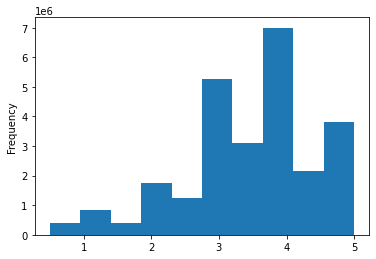

In [93]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

That seems to make sense. People are more likely to give whole number ratings than half, which explains the spikes in the histogram. The median score is 3.5, the mean is 3.53, and all the ratings are between 0 and 5.

# Merge Wikipedia and Kaggle Metadata

There are seven pairs of columns that have redundant information. We'll look at each pair of columns and decide how to handle the data.

There are a few options when dealing with redundant data. We'll consider two. The simplest is to just drop one of the competing columns, but sometimes that means a loss of good information. Sometimes, one column will have data where the other has missing data, and vice versa. In that case, we'd want the other option: fill in the gaps using both columns.

In [94]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [95]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle
# running_time             runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

## Title

In [96]:
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [97]:
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [98]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [99]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             DROP WIKIPEDIA
# running_time             runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

## Runtime

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

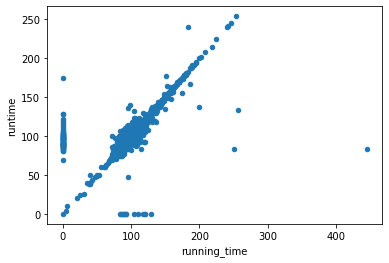

In [100]:
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

In [101]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             DROP WIKIPEDIA
# running_time             runtime                  KEEP GAGGLE; FILL ZEROS WITH WIKI DATA
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

## Budget

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

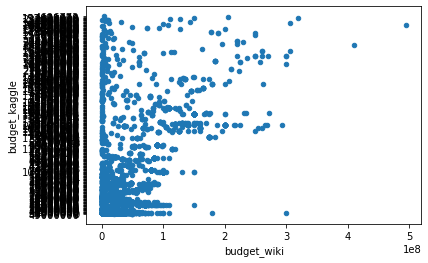

In [102]:
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')



Here are some questions to consider when interpreting this scatter plot:

    Which dataset seems to have more outliers?
    Which dataset seems to have more missing data points?
    If we were to fill in the missing data points of one set with the other, which would be more likely to give us consistent data?
    Is it better to start with a base of consistent data and fill in missing points with possible outliers? Or is it better to start with a base of data with outliers and fill in missing points with more consistent data?

The Wikipedia data appears to have more outliers compared to the Kaggle data. However, there are quite a few movies with no data in the Kaggle column, while Wikipedia does have budget data. Therefore, we'll fill in the gaps with Wikipedia's data.

In [103]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             DROP WIKIPEDIA
# running_time             runtime                  KEEP GAGGLE; FILL ZEROS WITH WIKI DATA
# budget_wiki              budget_kaggle            KEEP KAGGLE; FILL ZEROS WITH WIKI DATA
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

## Box Office 

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

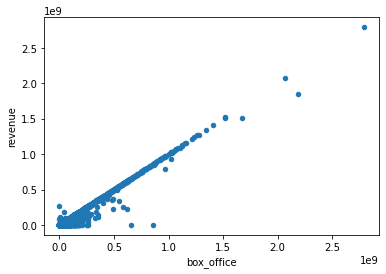

In [104]:
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

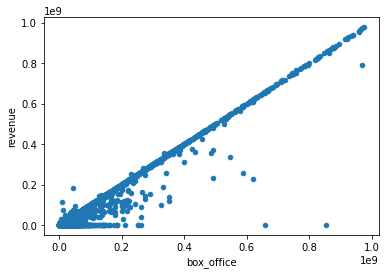

In [105]:
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

In [106]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             DROP WIKIPEDIA
# running_time             runtime                  KEEP GAGGLE; FILL ZEROS WITH WIKI DATA
# budget_wiki              budget_kaggle            KEEP KAGGLE; FILL ZEROS WITH WIKI DATA
# box_office               revenue                  KEEP KAGGLE; FILL ZEROS WITH WIKI DATA
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

## Release Date 
For release_date_wiki and release_date_kaggle, we can't directly make a scatter plot, because the scatter plot only works on numeric data. However, there's a tricky workaround that we can use. We'll use the regular line plot (which can plot date data), and change the style to only put dots by adding style='.' to the plot() method:

In [107]:
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

TypeError: no numeric data to plot

In [108]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,"[December 8, 2006, (, 2006-12-08, )]",United States,English,...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


In [109]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([3607], dtype='int64')

In [110]:
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [111]:
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1008,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",Geoff George,NaN,United States,NaN,...,1995-08-22,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice has a nasty sting.,Black Scorpion,False,6.10,7.00
1061,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,Flirt,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",Michael Spiller,NaN,"[United States, Germany, Japan, [1]]",NaN,...,1995-09-14,0.00,85.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Flirt,False,7.50,4.00
1121,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,Let It Be Me,NaN,NaN,Miroslav Ondrícek,NaN,NaN,NaN,...,1995-11-17,0.00,95.00,[],Released,NaN,Let It Be Me,False,8.00,2.00
1564,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,A Brooklyn State of Mind,NaN,NaN,Ken Kelsch,NaN,NaN,NaN,...,1998-01-01,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brooklyn State of Mind,False,5.00,1.00
1633,https://en.wikipedia.org/wiki/Highball_(film),1997,https://www.imdb.com/title/tt0119291/,Highball,NaN,"[Justine Bateman, Peter Bogdanovich, Chris Eig...",Steven Bernstein,NaN,United States,English,...,1997-01-01,0.00,110.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Highball,False,4.50,4.00
1775,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,NaN,United States,NaN,...,1999-02-22,0.00,86.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Crime at the Speed of Light,Velocity Trap,False,4.70,6.00
2386,https://en.wikipedia.org/wiki/The_Visit_(2000_...,2000,https://www.imdb.com/title/tt0199129/,The Visit,NaN,"[Hill Harper, Billy Dee Williams, Obba Babatun...",John L. Demps Jr.,NaN,NaN,English,...,2000-01-01,0.00,107.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,NaN,The Visit,False,0.00,0.00
2786,https://en.wikipedia.org/wiki/Stevie_(2002_film),2002,https://www.imdb.com/title/tt0334416/,Stevie,NaN,NaN,"[Dana Kupper, Gordon Quinn, Peter Gilbert]",NaN,United States,English,...,2002-09-09,"97,000.00",140.00,[],NaN,NaN,Stevie,False,6.70,13.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,"[Denmark, USA, UK]",NaN,...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,United States,English,...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


In [112]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             DROP WIKIPEDIA
# running_time             runtime                  KEEP GAGGLE; FILL ZEROS WITH WIKI DATA
# budget_wiki              budget_kaggle            KEEP KAGGLE; FILL ZEROS WITH WIKI DATA
# box_office               revenue                  DROP WIKIPEDIA
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

## Language

In [113]:
movies_df['Language'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


English                        5479
[English, Spanish]               68
[English, French]                35
[English, Japanese]              25
[English, Russian]               23
                               ... 
[English /, Zulu]                 1
[English, Hebrew, Spanish]        1
[English, Japanese, French]       1
[English, Spanish, Apache]        1
Russian                           1
Name: Language, Length: 197, dtype: int64

We don't need to worry about what hashing is right now, but if you're curious, hashing is a clever computer science trick that can be used to speed up algorithms like getting value counts. Hashing converts values, even arbitrarily long strings, to a limited space of numerical values. We'll talk about hashing more when we get to machine learning, but for now, the important part is that Python creates hash values when new objects are created if they are immutable. Since mutable objects can have their values change after being created, the values might change and not match the hash, so Python just refuses.

In [114]:
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                        5479
NaN                             134
(English, Spanish)               68
(English, French)                35
(English, Japanese)              25
                               ... 
(English /, Zulu)                 1
(English, Hebrew, Spanish)        1
(English, Japanese, French)       1
(English, Spanish, Apache)        1
Russian                           1
Name: Language, Length: 198, dtype: int64

In [115]:
movies_df['original_language'].value_counts(dropna=False)

en    5987
fr      16
es      10
it       8
de       6
ja       4
pt       4
zh       4
da       2
hi       2
sv       1
ko       1
ab       1
tr       1
he       1
ar       1
cn       1
ru       1
Name: original_language, dtype: int64



There's a trade-off here between the Wikipedia language data and the Kaggle language data. While the Wikipedia data has more information about multiple languages, the Kaggle data is already in a consistent and usable format. Parsing the Wikipedia data may create too many difficulties to make it worthwhile, though.

Plan portion of theprocess

This is another judgment call; there's no clear-cut answer here. However, for better or for worse, decisions that save time are usually the ones that win, so we'll use the Kaggle data here.


In [116]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             DROP WIKIPEDIA
# running_time             runtime                  KEEP GAGGLE; FILL ZEROS WITH WIKI DATA
# budget_wiki              budget_kaggle            KEEP KAGGLE; FILL ZEROS WITH WIKI DATA
# box_office               revenue                  DROP WIKIPEDIA
# release_date_wiki        release_date_kaggle      DROP WIKIPEDIA
# Language                 original_language
# Production company(s)    production_companies

## Production Companies

In [117]:
movies_df[['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [118]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             DROP WIKIPEDIA
# running_time             runtime                  KEEP GAGGLE; FILL ZEROS WITH WIKI DATA
# budget_wiki              budget_kaggle            KEEP KAGGLE; FILL ZEROS WITH WIKI DATA
# box_office               revenue                  DROP WIKIPEDIA
# release_date_wiki        release_date_kaggle      DROP WIKIPEDIA
# Language                 original_language        DROP WIKI
# Production company(s)    production_companies     DROP WIKI

## Put it all together 

In [119]:
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)

In [120]:
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [121]:
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

,url,year,imdb_link,Based on,Starring,Cinematography,Release date,Country,Director,Distributor,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,Renny Harlin,20th Century Fox,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,James Foley,Avenue Pictures,...,1990-08-24,"2,700,000.00",114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,Roger Spottiswoode,TriStar Pictures,...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,Woody Allen,Orion Pictures,...,1990-12-25,"7,331,647.00",102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,John Cornell,Paramount Pictures,...,1990-12-21,"6,939,946.00",95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,"[12 February 2017, (, 2017-02-12, ), (, Berlin...","[Chile, Germany, Spain, United States, [2]]",Sebastián Lelio,"[Participant Media (Chile), Piffl Medien (Germ...",...,2017-04-06,"3,700,000.00",104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,"[April 22, 2017, (, 2017-04-22, ), (, Tribeca ...",United States,Brian Crano,Good Deed Entertainment,...,2017-04-22,NaN,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,"[18 May 2017, (, 2017-05-18, ), (, Cannes, ), ...","[Russia, France, Belgium, Germany, [3]]",Andrey Zvyagintsev,"[Sony Pictures Releasing, (Russia), [1]]",...,2017-06-01,"4,800,000.00",128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,"[March 12, 2017, (, 2017-03-12, ), (, SXSW, ),...",United States,Aaron Katz,Neon,...,2017-03-12,"200,340.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemin

In [122]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

adult


In [125]:
movies_df['video'].value_counts(dropna=False)

False    6050
True        1
Name: video, dtype: int64

In [126]:
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]

In [127]:
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

# Tranform and Merge Rating Data
For each movie, Britta wants to include the rating data, but the rating dataset has so much information that it's too unwieldy to use all of it. We could calculate some basic statistics like the mean and median rating for each movie, but a more useful summary is just to count how many times a movie received a given rating. This way, someone who wants to calculate statistics for the dataset would have all the information they need. 

We'll include the raw ratings data if the hackathon participants want to do more in-depth analysis, such as comparing across users, but having the rating counts for each movie is easy enough to do. Plus, it will enable the hackathon participants to calculate statistics on their own without having to work with a dataset containing 26-million rows.

First, we need to use a groupby on the "movieId" and "rating" columns and take the count for each group.

In [128]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count()

In [129]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1)

In [130]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) \
                .pivot(index='movieId',columns='rating', values='count')

In [131]:
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]

In [132]:
movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [133]:
movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)

NameError: name 'movies_with_ratings_df' is not defined